In [1]:
import pickle

In [2]:
with open("../data/psychotic_posts.pickle", "rb") as p:
    psychotic_posts = pickle.load(p)

In [3]:
psychosis_sample = list(psychotic_posts.items())[0][1][0]["text"].lower()

In [4]:
import os
import stanza
from stanza.server import CoreNLPClient

/home/rain/Documents/GRIS/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
os.environ["CORENLP_HOME"] = "/home/rain/.stanfordnlp_resources/stanford-corenlp-4.1.0"

In [6]:
client = CoreNLPClient(timeout=150000000, be_quiet=True, annotators=['openie'], endpoint='http://localhost:1234')
client.start()
doc = client.annotate(psychosis_sample, output_format="json")
triples = []
for sentence in doc['sentences']:
    for triple in sentence['openie']:
        triples.append({
           'subject': triple['subject'],
           'relation': triple['relation'],
            'object': triple['object']
        })
client.stop()

2022-07-31 20:59:19 INFO: Writing properties to tmp file: corenlp_server-eb13f91905c4465a.props
2022-07-31 20:59:19 INFO: Starting server with command: java -Xmx5G -cp /home/rain/.stanfordnlp_resources/stanford-corenlp-4.1.0/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 1234 -timeout 150000000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-eb13f91905c4465a.props -annotators openie -preload -outputFormat serialized


In [7]:
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
g = nx.DiGraph()
for triplet in triples:
    g.add_edge(triplet["subject"], triplet["object"], relation=triplet["relation"])

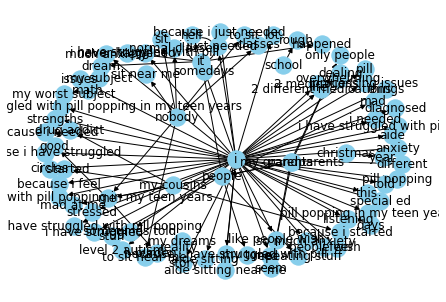

In [9]:
nx.draw(g, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues)

In [10]:
g.nodes

NodeView(('people', 'it', 'mad', 'i', 'things', 'mad at me', 'level 2 autism', 'diagnosed', 'somedays', 'hell', 'christmas', 'year', 'listening', 'issues', 'processing issues', 'stuff', 'repeating stuff', 'much anxiety', 'so much anxiety', 'anxiety', 'my tone', 'told', 'sometimes told', 'me', 'good', 'circles', 'my grandparents', 'seem', 'parents', 'only people', 'school', 'rough', 'special ed', 'ed', 'math', 'my subject', 'my worst subject', 'nobody', 'normal classes', 'aide sitting', 'aide', 'to sit near me', 'aide sitting near me', 'sit near me', 'classes', 'to sit', 'sit', 'i just needed', 'because i needed', 'this', 'because i just needed', 'i needed', 'burden', 'strengths', 'days', 'people wish', 'like people wish', 'different', 'stressed', 'because i feel', 'i feel', '2 medications', '2 different medications', 'dealing', 'overwhelming', 'my cousins', 'drug addict', 'because i have struggled with pill popping in my teen years', 'i have struggled with pill', 'i have struggled', 'b

In [11]:
g.edges

OutEdgeView([('people', 'it'), ('people', 'mad'), ('people', 'mad at me'), ('people', 'stuff'), ('people', 'repeating stuff'), ('people', 'my tone'), ('it', 'happened'), ('it', 'never happened'), ('it', 'dream'), ('it', 'it'), ('i', 'things'), ('i', 'level 2 autism'), ('i', 'diagnosed'), ('i', 'listening'), ('i', 'issues'), ('i', 'processing issues'), ('i', 'much anxiety'), ('i', 'so much anxiety'), ('i', 'anxiety'), ('i', 'told'), ('i', 'sometimes told'), ('i', 'circles'), ('i', 'special ed'), ('i', 'ed'), ('i', 'aide sitting'), ('i', 'aide'), ('i', 'aide sitting near me'), ('i', 'i just needed'), ('i', 'because i needed'), ('i', 'this'), ('i', 'because i just needed'), ('i', 'it'), ('i', 'i needed'), ('i', 'strengths'), ('i', 'days'), ('i', 'people wish'), ('i', 'like people wish'), ('i', 'different'), ('i', 'stressed'), ('i', 'because i feel'), ('i', 'i feel'), ('i', '2 medications'), ('i', '2 different medications'), ('i', 'because i have struggled with pill popping in my teen year

In [12]:
for relation in g.edges.data("relation"):
    print(relation)

('people', 'it', 'get for')
('people', 'mad', 'get')
('people', 'mad at me', 'get')
('people', 'stuff', 'do like though')
('people', 'repeating stuff', 'do like')
('people', 'my tone', 'comment on')
('it', 'happened', 'turned out')
('it', 'never happened', 'turned out')
('it', 'dream', 'was')
('it', 'it', 'turned out')
('i', 'things', 'do learn well')
('i', 'level 2 autism', "'m diagnosed with")
('i', 'diagnosed', "'m")
('i', 'listening', 'struggle with')
('i', 'issues', 'have')
('i', 'processing issues', 'have')
('i', 'much anxiety', 'have')
('i', 'so much anxiety', 'have lately')
('i', 'anxiety', 'have lately')
('i', 'told', 'get')
('i', 'sometimes told', 'get')
('i', 'circles', 'spin in')
('i', 'special ed', 'was in')
('i', 'ed', 'was in')
('i', 'aide sitting', 'always had')
('i', 'aide', 'had')
('i', 'aide sitting near me', 'had')
('i', 'i just needed', "'m talking")
('i', 'because i needed', "'m talking")
('i', 'this', "'m talking about")
('i', 'because i just needed', "'m talking

In [13]:
nx.node_connectivity(g)

0

In [14]:
nx.number_connected_components(g.to_undirected())

7

In [15]:
nx.number_strongly_connected_components(g)

88

In [16]:
nx.number_weakly_connected_components(g)

7

In [17]:
degree_centrality = nx.degree_centrality(g)
for k, v in degree_centrality.items():
    print(f"{k}: {v}")

people: 0.09195402298850575
it: 0.08045977011494253
mad: 0.011494252873563218
i: 0.5287356321839081
things: 0.011494252873563218
mad at me: 0.011494252873563218
level 2 autism: 0.011494252873563218
diagnosed: 0.011494252873563218
somedays: 0.011494252873563218
hell: 0.011494252873563218
christmas: 0.011494252873563218
year: 0.011494252873563218
listening: 0.011494252873563218
issues: 0.011494252873563218
processing issues: 0.011494252873563218
stuff: 0.011494252873563218
repeating stuff: 0.011494252873563218
much anxiety: 0.011494252873563218
so much anxiety: 0.011494252873563218
anxiety: 0.011494252873563218
my tone: 0.011494252873563218
told: 0.011494252873563218
sometimes told: 0.011494252873563218
me: 0.04597701149425287
good: 0.011494252873563218
circles: 0.011494252873563218
my grandparents: 0.034482758620689655
seem: 0.022988505747126436
parents: 0.034482758620689655
only people: 0.022988505747126436
school: 0.011494252873563218
rough: 0.011494252873563218
special ed: 0.01149425

In [18]:
avg_degree_centrality = sum(list(degree_centrality.values())) / len(list(degree_centrality.values()))
print(f"Average degree centrality: {avg_degree_centrality}")

Average degree centrality: 0.022204806687565363


In [19]:
in_degree_centrality = nx.in_degree_centrality(g)
for k, v in in_degree_centrality.items():
    print(f"{k}: {v}")

people: 0.022988505747126436
it: 0.034482758620689655
mad: 0.011494252873563218
i: 0.0
things: 0.011494252873563218
mad at me: 0.011494252873563218
level 2 autism: 0.011494252873563218
diagnosed: 0.011494252873563218
somedays: 0.0
hell: 0.011494252873563218
christmas: 0.0
year: 0.011494252873563218
listening: 0.011494252873563218
issues: 0.011494252873563218
processing issues: 0.011494252873563218
stuff: 0.011494252873563218
repeating stuff: 0.011494252873563218
much anxiety: 0.011494252873563218
so much anxiety: 0.011494252873563218
anxiety: 0.011494252873563218
my tone: 0.011494252873563218
told: 0.011494252873563218
sometimes told: 0.011494252873563218
me: 0.022988505747126436
good: 0.011494252873563218
circles: 0.011494252873563218
my grandparents: 0.0
seem: 0.022988505747126436
parents: 0.0
only people: 0.022988505747126436
school: 0.0
rough: 0.011494252873563218
special ed: 0.011494252873563218
ed: 0.011494252873563218
math: 0.0
my subject: 0.011494252873563218
my worst subject: 

In [20]:
avg_in_degree_centrality = sum(list(in_degree_centrality.values())) / len(list(in_degree_centrality.values()))
print(f"Average in degree centrality: {avg_in_degree_centrality}")

Average in degree centrality: 0.011102403343782645


In [21]:
out_degree_centrality = nx.out_degree_centrality(g)
for k, v in out_degree_centrality.items():
    print(f"{k}: {v}")

people: 0.06896551724137931
it: 0.04597701149425287
mad: 0.0
i: 0.5287356321839081
things: 0.0
mad at me: 0.0
level 2 autism: 0.0
diagnosed: 0.0
somedays: 0.011494252873563218
hell: 0.0
christmas: 0.011494252873563218
year: 0.0
listening: 0.0
issues: 0.0
processing issues: 0.0
stuff: 0.0
repeating stuff: 0.0
much anxiety: 0.0
so much anxiety: 0.0
anxiety: 0.0
my tone: 0.0
told: 0.0
sometimes told: 0.0
me: 0.022988505747126436
good: 0.0
circles: 0.0
my grandparents: 0.034482758620689655
seem: 0.0
parents: 0.034482758620689655
only people: 0.0
school: 0.011494252873563218
rough: 0.0
special ed: 0.0
ed: 0.0
math: 0.022988505747126436
my subject: 0.0
my worst subject: 0.0
nobody: 0.08045977011494253
normal classes: 0.0
aide sitting: 0.0
aide: 0.0
to sit near me: 0.0
aide sitting near me: 0.0
sit near me: 0.0
classes: 0.0
to sit: 0.0
sit: 0.0
i just needed: 0.0
because i needed: 0.0
this: 0.0
because i just needed: 0.0
i needed: 0.0
burden: 0.0
strengths: 0.0
days: 0.0
people wish: 0.0
like

In [22]:
avg_out_degree_centrality = sum(list(out_degree_centrality.values())) / len(list(out_degree_centrality.values()))
print(f"Average out degree centrality: {avg_out_degree_centrality}")

Average out degree centrality: 0.011102403343782652


In [23]:
eigen = nx.eigenvector_centrality(g, max_iter=2000)
for k, v in eigen.items():
    print(f"{k}: {v}")

people: 5.602898590602407e-07
it: 0.5000049352269168
mad: 6.31816224046654e-06
i: 1.1921060831068946e-08
things: 2.861054599456546e-07
mad at me: 6.31816224046654e-06
level 2 autism: 2.861054599456546e-07
diagnosed: 2.861054599456546e-07
somedays: 1.1921060831068946e-08
hell: 2.861054599456546e-07
christmas: 1.1921060831068946e-08
year: 2.861054599456546e-07
listening: 2.861054599456546e-07
issues: 2.861054599456546e-07
processing issues: 2.861054599456546e-07
stuff: 6.31816224046654e-06
repeating stuff: 6.31816224046654e-06
much anxiety: 2.861054599456546e-07
so much anxiety: 2.861054599456546e-07
anxiety: 2.861054599456546e-07
my tone: 6.31816224046654e-06
told: 2.861054599456546e-07
sometimes told: 2.861054599456546e-07
me: 5.602898590602407e-07
good: 6.31816224046654e-06
circles: 2.861054599456546e-07
my grandparents: 1.1921060831068946e-08
seem: 5.602898590602407e-07
parents: 1.1921060831068946e-08
only people: 5.602898590602407e-07
school: 1.1921060831068946e-08
rough: 2.86105459

In [24]:
avg_eigen = sum(list(eigen.values())) / len(list(eigen.values()))
print(f"Average eigenvector centrality: {avg_eigen}")

Average eigenvector centrality: 0.022728078613884286


In [25]:
closeness_centrality = nx.closeness_centrality(g)
for k, v in closeness_centrality.items():
    print(f"{k}: {v}")

people: 0.022988505747126436
it: 0.03065134099616858
mad: 0.020689655172413793
i: 0.0
things: 0.011494252873563218
mad at me: 0.020689655172413793
level 2 autism: 0.011494252873563218
diagnosed: 0.011494252873563218
somedays: 0.0
hell: 0.011494252873563218
christmas: 0.0
year: 0.011494252873563218
listening: 0.011494252873563218
issues: 0.011494252873563218
processing issues: 0.011494252873563218
stuff: 0.020689655172413793
repeating stuff: 0.020689655172413793
much anxiety: 0.011494252873563218
so much anxiety: 0.011494252873563218
anxiety: 0.011494252873563218
my tone: 0.020689655172413793
told: 0.011494252873563218
sometimes told: 0.011494252873563218
me: 0.022988505747126436
good: 0.020689655172413793
circles: 0.011494252873563218
my grandparents: 0.0
seem: 0.022988505747126436
parents: 0.0
only people: 0.022988505747126436
school: 0.0
rough: 0.011494252873563218
special ed: 0.011494252873563218
ed: 0.011494252873563218
math: 0.0
my subject: 0.011494252873563218
my worst subject: 0

In [26]:
avg_closeness_centrality = sum(list(closeness_centrality.values())) / len(list(closeness_centrality.values()))
print(f"Average closeness centrality: {avg_closeness_centrality}")

Average closeness centrality: 0.012310803964408977
